c:\Users\lynnh\OneDrive\research\cell_classification\scripts\get_features.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe_labels['dendrite_type_number'] = le1.transform(filtered_dataframe_labels['dendrite_type'])
c:\Users\lynnh\OneDrive\research\cell_classification\scripts\get_features.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe_labels['structure_layer_name_number'] = le2.transform(filtered_dataframe_labels['structure_layer_name'])
c:\Users\lynnh\OneDrive\

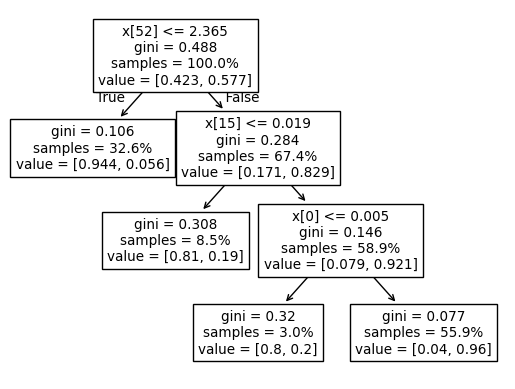

In [9]:
import pandas as pd
from get_features import get_dataframes, get_labels
from decisionTree import make_decisionTree, get_acc
import numpy as np
from sklearn.model_selection import train_test_split


result = get_labels()
ef_df_labels = get_dataframes()

full_dataframe = pd.merge(ef_df_labels, result, left_index=True, right_index=True)


X=full_dataframe.drop(result.columns, axis=1)
Y = full_dataframe["dendrite_type"]
max_leaf_nodes = 4

make_decisionTree(X, Y, max_leaf_nodes)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.20, random_state=42)

list_nodes = np.arange(2, 24, 2)

train_acc, test_acc = get_acc(X_train, y_train, X_test, y_test, list_nodes)
print(train_acc)
print(test_acc)

[0.8663967611336032, 0.937246963562753, 0.9473684210526315, 0.9615384615384616, 0.9696356275303644, 0.9736842105263158, 0.9817813765182186, 0.9858299595141701, 0.9878542510121457, 0.9898785425101214, 0.9919028340080972]
[0.8790322580645161, 0.9596774193548387, 0.9435483870967742, 0.967741935483871, 0.9758064516129032, 0.967741935483871, 0.9596774193548387, 0.9596774193548387, 0.9516129032258065, 0.9435483870967742, 0.9435483870967742]


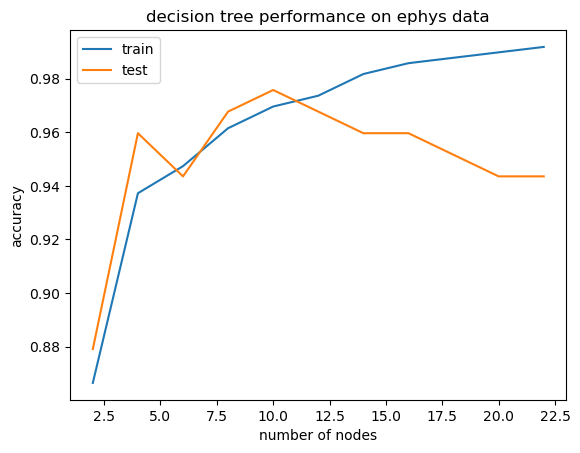

In [17]:
import matplotlib.pyplot as plt
fig, ax  = plt.subplots()

plt.plot(list_nodes, train_acc, label = "train")
plt.plot(list_nodes, test_acc, label = "test")
plt.xlabel("number of nodes")
plt.ylabel("accuracy")
plt.title("decision tree performance on ephys data")
plt.legend()
plt.show

plt.savefig("DecisionTreePerformance_ephys.png")

[[204   5]
 [  8 277]]
[[206   3]
 [  0 285]]


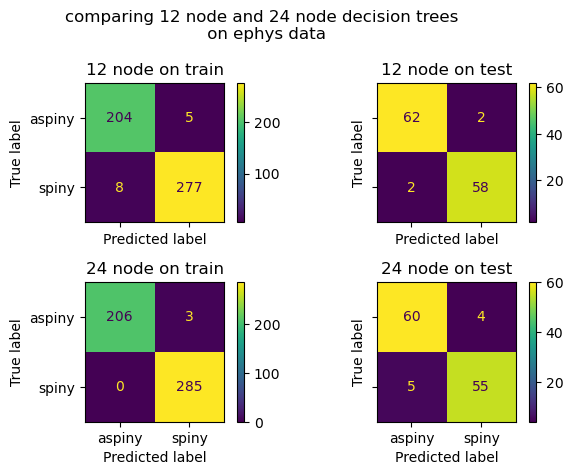

In [34]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
#12 nodes
fig, ax  = plt.subplots(nrows=2, ncols=2, sharex = True, sharey=True)

clf = DecisionTreeClassifier(max_leaf_nodes=12, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_pred)
print(matrix)

from sklearn.metrics import ConfusionMatrixDisplay
ax[0,0].set_title('12 node on train')
ax[0,1].set_title("12 node on test")
ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, ax = ax[0,0])
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax= ax[0, 1])

# 24 nodes 

clf2 = DecisionTreeClassifier(max_leaf_nodes=24, random_state=0)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_train)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, y_pred)
print(matrix)

ax[1,0].set_title('24 node on train')
ax[1,1].set_title("24 node on test")
ConfusionMatrixDisplay.from_estimator(clf2, X_train, y_train, ax = ax[1, 0])
ConfusionMatrixDisplay.from_estimator(clf2, X_test, y_test, ax= ax[1, 1])

fig.suptitle("comparing 12 node and 24 node decision trees \n on ephys data")
plt.tight_layout()

plt.savefig("comparingNodes_ephys.png")